In [1]:
from network import *
from inference import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
network = Network(N=30)

In [3]:
A0 = network.generate_A0(T=1, avg_degree=20)
A1 = network.apply_exposure(A0, K_exp=3)

In [4]:
mu, Z, u, v, w = network.get_mu(), network.get_Z(), network.get_u(), network.get_v(), network.get_w()

## Testing Exposure Inference

In [5]:
losses_exp, theta_exp = fit(A0, 3,3, true_u=u, true_v=v, true_w=w, true_mu=mu, iter1=100)
mu_exp,Q_exp,u_exp,v_exp,w_exp = theta_exp

updating Q
running Exp inference for 1500 iterations: 

updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating Q
updating 

/home/jschulz/DynamicExposure/src/inference.py:49: RuntimeWarning: divide by zero encountered in true_divide
  posterior = control_well_definedness(Q*np.log(1/Q) + (1-Q)*np.log(1/(1-Q))).sum()
/home/jschulz/DynamicExposure/src/inference.py:49: RuntimeWarning: invalid value encountered in multiply
  posterior = control_well_definedness(Q*np.log(1/Q) + (1-Q)*np.log(1/(1-Q))).sum()


In [6]:
print("Accuracy predicting mu: ", evaluate_memberships(mu, mu_exp, mu, mu_exp)[0])
print("Accuracy predicting u: ", evaluate_memberships(u, u_exp, mu, mu_exp)[0])
print("Accuracy predicting v: ", evaluate_memberships(v, v_exp, mu, mu_exp)[0])
print("Accuracy predicting Z: ", calculate_AUC(Z, Q_exp))

Accuracy predicting mu:  1.0
Accuracy predicting u:  1.0
Accuracy predicting v:  1.0
Accuracy predicting Z:  0.5440115481859049


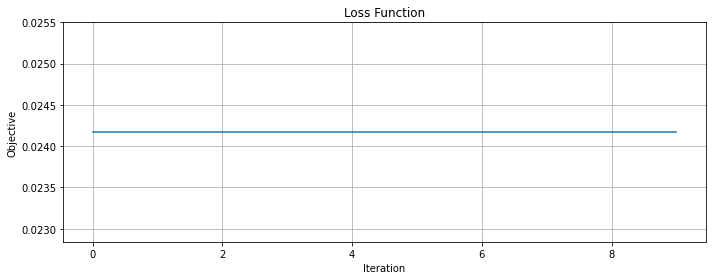

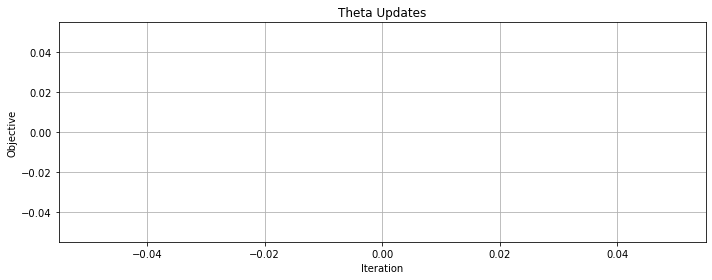

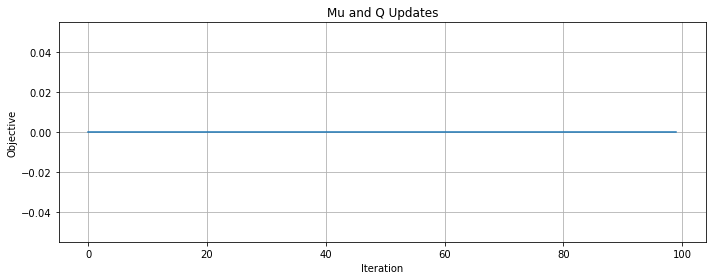

In [13]:
plot_losses(losses_exp[0], title="Loss Function")
plot_losses(losses_exp[1], title="Theta Updates")
plot_losses(losses_exp[2], title="Mu and Q Updates")

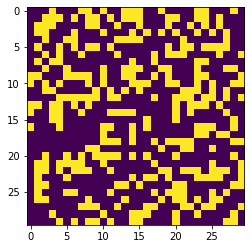

In [8]:
plt.imshow(Z.sum(axis=0))

In [9]:
Z.shape

(1, 30, 30)

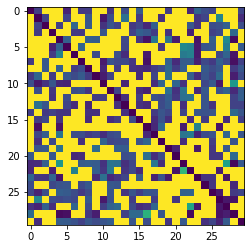

In [10]:
plt.imshow(Q_exp.sum(axis=0))

## No Exposure Inference

In [11]:
losses_noexp, theta_noexp = fit(A0, 3,3, iter1=100, exp=False)
u_noexp,v_noexp,w_noexp = theta_noexp

running NoExp inference for 20000 iterations: 

Convergence Criterium satisfied
No exposure inference with T=1, N=30, K=3 and 1360 iterations took 0.8816388049999659 seconds



In [12]:
evaluate_memberships(u, u_noexp, v, v_noexp, verbose=True)

Acccuracy of predictions: 
	 u: 0.699781956342006
	 v: 0.6915839284849372
Zero estimate counts: 
	 u: 0
	 v: 0





(0.699781956342006, 0.6915839284849372, 30, 30)